<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch5_1~5_pg_290~319_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 머신러닝 완벽가이드 ch5. 1 ~ 5 pg. 290 ~ 319 필사

##chapter 05 회귀

회귀분석: 데이터값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법, 여러개의 독립변수와 한개의 종속변수 간의 상관관계를 모델링하는 기법 통칭

-회귀계수: 독립변수의 값에 영향을 미치는 값

-독립변수는 피처에 해당되며 종속변수는 결정값

-회귀계수가 선형이냐 아니냐로 선형회귀와 비선형 회귀, 독립변수 개수가 한개인지 여러개인지에 따라 단일회귀, 다중회귀로 나뉨

->지도학습: 회귀(예측값 연속형 숫자값)+분류(예측값 이산형)

-> 선형 회귀: 실제값과 예측값의 차이를 최소화하는 직선형 회귀선 최적화 방식


### 02 단순 선형 회귀를 통한 회귀 이해

-독립변수 1개인 단순 선형 회귀: 기울기 w1과 절편 w0을 회귀계수로 지칭, Yhat=w0+w1*X : 실제값과 회귀모델 차이에 따른 오류값을 잔차라함

-> 최적의 회귀 모델: 잔차 합이 최소되는 모델, 오류 값 합이 최소되는 모델 (Error**2=RSS)

-RSS 최소로하는 w0, w1 회귀계수

-비용함수: RSS: RSS(w0,w1)=1/N*(sum((y-(w0+w1*x))^2))


### 03 비용 최소화하기 - 경사 하강법 소개 (gradient descent)

비용함수가 최소가 되는 W 파라미터

-비용함수 RSS 최소화하는 방법-> 경사하강법: 점진적으로 반복적인 계산 통해 W 파라미터 값 업데이트 하면서 오류값이 최소가 되는 W 파라미터 구하는 방식

EX) 공 던지기 같이 비용함 수 포물선 인 경우 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 감주하고 그때의 W 반환

R(W) 최소화 하는 값 순차적 편미분 수행 -> 편미분 값 너무 클수 있으므로 보정계수 & 곱하는데 이게 학습률

-경사하강법 프로세스

1. 임의의 W 설정, 첫 비용함수값 계산

2. W1를 W1+&*2/N-- 등으로 W 업데이트 후 다시 비용 함수 값 계산

3. 비용함수 값 감소했으면 다시 STEP 2 반복, 비용함수 값 감소하지 않으면 그때의 W 구하고 반복 중지

-경사 하강법 이용해 회귀계수 도출, 단순선형회귀로 예측할만한 데이터 세트 만들자

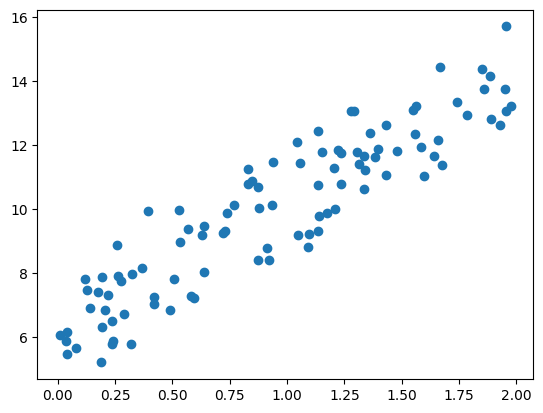

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4 * x + 6 을 근사 (w1=4,w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [3]:
#비용 함수 정의
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [6]:
#경사하강법 함수 생성해 구현 w1,w0 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1와 w0 업데이트
#get_weight_update() 함수에서 입력 배열 x 값에 대한 예측 배열 y_pred는 np.dot(x,w1.T)+w0으로 구함
#100개의 데이터 x 있다면 예측값은 w0+x(1)*w1+x(2)*w1+...+x(100)*w1이며 이는 입력배열 x와 w1 배열의 내적과 동일
#넘파이의 내적 연산 dot()를 이용해 y_pred=np.dot(x,w1.T)+w0로 예측 배열값 계산

# w0, w1를 업데이트 할 w0_update, w1_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)

  # 먼저 w0_update, w1_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 예측 배열을 계산하고 예측과 실제 값의 차이를 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w0, w1를 업데이트할 w0_update, w1_update 계산
  w1_update = -(2 / N) * learning_rate * (np.dot(X.T, diff))
  w0_update = -(2 / N) * learning_rate * (np.dot(w0_factors.T, diff))

  return w0_update, w1_update

In [7]:
#get_weight_updates()을 경사하강방식으로 반복 수행해 w1, w0 업데이트하는 함수인 gradient_descent_steps() 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1, w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):

  # w0, w1을 0으로 초기화
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters 만큼 반복적으로 get_weights_updates를 호출하여 w1, w0 업데이트
  for ind in range(iters):
    w0_update, w1_update = get_weight_updates(w1, w0, X, y, 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
#gradient_descent_steps() 호출해 w1, w0 구해보기, 최종적으로 예측값과 실제값의 RSS 차이 계산하는 get_cost() 함수 생성하고 이용해 경사하강법의 예측 오류 계산

def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred)) / N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


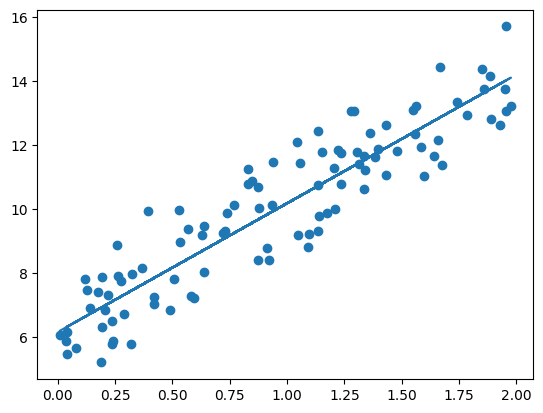

In [9]:
#y_pred 기반 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)

In [13]:
#보통 확률적 경사 하강법 이용: 전체 입력데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w 업데이트 되는 값 계산-> 빠름
#대용량 데이터 경우 확률적 경사하강법, 미니배치확률적 경사하강법 이용해 최적 비용함수 도출
#미니 배치 확률적 경사하강법 -> stochastic_gradient_descent_steps() 함수로 구현

def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반 w1_update, w0_update 계산후 업데이트
    w1_update, w0_update=get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1, w0

In [15]:
#stochastic_gradient_descent_steps() 이용해 w1, w0 및 예측 오류 비용 계산
w1, w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1: 22.836 w0: -15.165
Gradient Descent Total Cost: 131.9194


확률적 경사하강법과 경사하강법의 결과 큰 차이 없음

피처 여러개인 경우 회귀 계수 도출 방법: 1개인 경우 확장해 유사하게 도출

선행대수 이용

## 04 사이킷런 LinearRegression 을 이용한 보스턴 주택 가격 예측

### LinearRegression 클래스 - Ordinary Least Squares

예측값과 실제값의 RSS 최소화해 OLS 추정방식으로 구현한 클래스

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

입력파라미터: fit_intercept (절편값 계산할지 말지 결정), normalize (true인 경우 회귀 수행전 입력 데이터 세트 정규화 진행)

속성: coef(회귀계수 배열형태로 저장), intercept_(intercept 값)

- 다중공선성 문제: 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 민감해짐,pca 통해 차원 축소 수행, 독립적인 중요한 피처 남기고 제거 또는 규제 적용

###회귀평가지표

MAE, MSE, RMSE, R^2

###LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
#from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
#boston = load_boston()

# boston 데이터 세트 DataFrame 변환
#bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
#bostonDF['PRICE'] = boston.target
#print('Boston 데이터 세트 크기:',bostonDF.shape)
#bostonDF.head()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


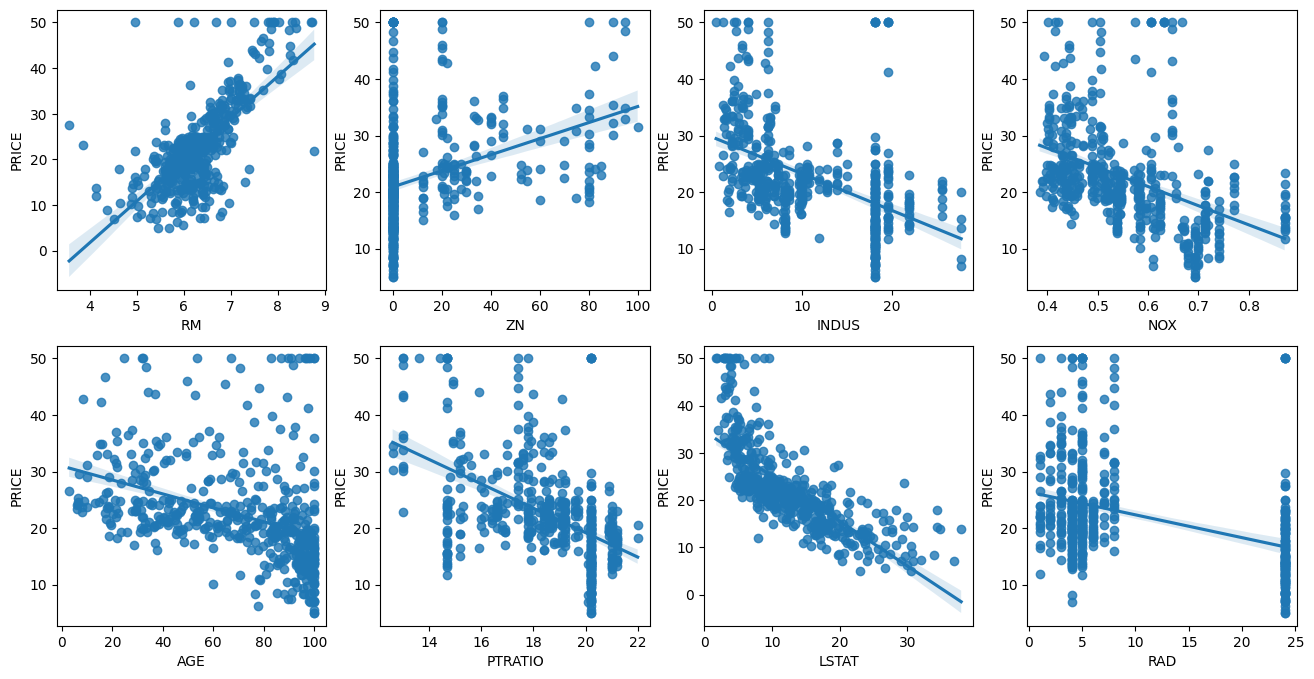

In [20]:
#각 칼럼이 회귀 결과에 미치는 영향이 어느정도 인지 시각화

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [21]:
#다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러짐
#RM은 양방향의 선형성이 가장 큼-> 방 크기 클수록 가격 증가
#LSTAT 음방향의 선형성 가장 큼-> LSTAT 적을수록 PRICE 증가

#보스턴 주택 가격 회귀 모델

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [22]:
#절편은 LinearRegression 객체의 intercept_ 속성에, 회귀계수는 coef_ 속성에 값 저장돼있음
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [23]:
#coef_ 속성은 회귀계수값만 가지고 있으므로 이를 피처별 회귀계수값으로 다시 매핑후 높은값순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [24]:
#RM이 양의값으로 회귀계수 가장 크며, NOX 피처의 회귀계수 - 값이 너무 커보임 최적화수행하며 피처 coefficient 변화도 살펴봐야함
#5개의 폴드 세트에서 cross_val_score() 이용해 교차검증으로 MSE와 RMSE 측정

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 05 다항 회귀와 과(대)적합/과소적합 이해

###다항 회귀 이해

다항 회귀: 선형 회귀: 회귀계수가 선형

-> PolynomialFeatures 클래스 fit(), transform() 메서드 이용해 변환

In [25]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [26]:
#3차다항계수 이용해 3차 다항회귀함수식 유도, 회귀 계수 예측

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)


일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [27]:
# 3 차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [28]:
#일차 단항식계수 피처는 2개, 3차 변환이후 다항식 계수 피처가 10개로 늘어남
#사이킷런의 pipeline 객체 이용해 한번에 다항회귀 구현하는 것

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


###다항 회귀를 이용한 과소적합 및 과적합 이해

다항식 차수 높아질수록 복잡한 피처간의 관계까지 모델링 가능

다항회귀의 차수를 높일수록 학습데이터에만 너무 맞춘 학습이 이뤄져 테스트 데이터 환경에서는 오히려 예측 정호가도 떨어짐-> 차수 높아질수록 과적합 문제 발생

다항회귀의 차수 변환시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

예측 결과를 비교할 다항식 차수를 1, 4, 15 변경하면서 결과를 비교해 보기

다항식 차수별로 학습을 수행한 후 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가

-> 차수별 회귀 예측 곡선 그리기


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


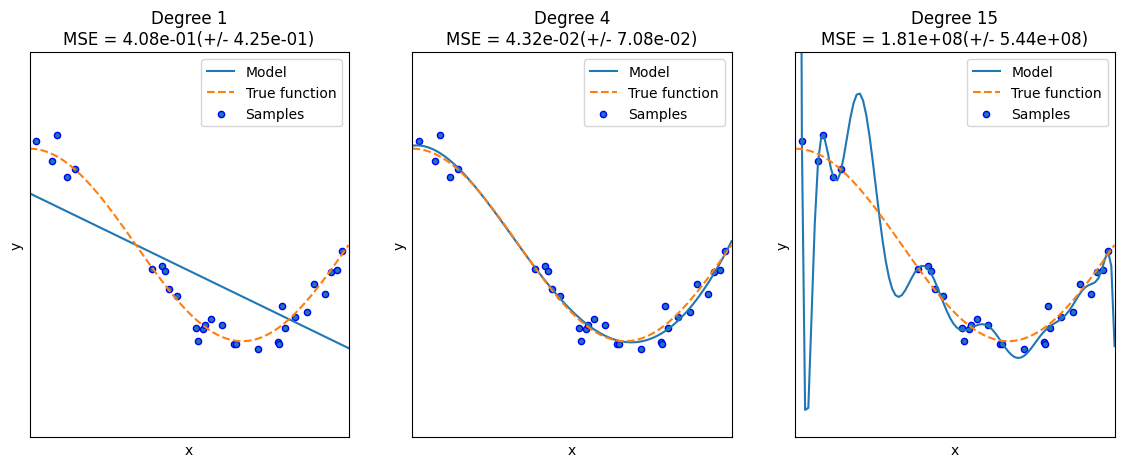

In [30]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)

    #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

실선으로 표현된 예측 곡선은 다항회귀예측곡선

점선으로 표현된 곡선은 실제 데이터 세트의 코사인 곡선

1. degree 1 : 단순 선형 회귀와 똑같
2. degree 4 : 실제 데이터 세트와 유사
3. degree 15 : 큰 오류값 발생: 과적합 강조한 결과

###편향-분산 트레이드오프(bias-variance trade off)

Degree 1 : 단순: 지나치게 한 방향으로 치우친 경향이 있는 모델
-> 고편향(High Bias)성

Degree 15 : 복잡, 높은 변동성-> 고분산(High Variance)성

-Low Bias/Low Variance: 예측 결과가 실제 결과에 비해 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부위에 집중돼 있는 아주 뛰어난 성능을 보여

-Low Bias/High Variance: 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 꽤 넓게 분포, 과적합 쉬움

-High Bias/Low Variance: 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중, 과소적합 쉬움

-High Bias/High Variance: 정확한 예측 결과를 벗어나면서도 넓은 부분에 분포

 bias와 variance는 한 쪽이 높으면 다른 한 쪽이 낮아지는 경향 존재

 bias가 너무 높으면 전체 error가 높고, bias를 점점 낮추면 동시에 variance는 높아지면서 전체 error는 낮아짐, 전체 error가 가장 낮아지는 골디락스 지점을 통과하면서 분산은 지속적으로 높이면 전체 error는 오히려 증가하면서 예측 성능이 다시 낮아짐

편향과 분산이 서로 트레이드오프를 이루면서 최소 Cost를 가지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델 만드는 방법